In [1]:
from samana.Data.he0435 import HE0435_NIRCAM
from samana.Model.he0435_model_nircam import HE0435ModelNircamEPLM1M3M4Shear
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates

In [ ]:
# imgdata = data.kwargs_data['image_data']

# deltaPix, ra_at_xy_0, dec_at_xy_0, transform_pix2angle, window_size = data.coordinate_properties
# _x = np.linspace(-window_size / 2, window_size / 2, imgdata.shape[0])
# _y = np.linspace(-window_size / 2, window_size / 2, imgdata.shape[1])
# likelihood_mask = np.ones_like(imgdata)
# x_main = -0.05
# y_main = -0.
# r_main = 0.3
# _xx, _yy = np.meshgrid(_x - x_main, _y - y_main)
# inds_main_deflector = np.where(np.sqrt(_xx ** 2 + _yy ** 2) < r_main / 2)
# likelihood_mask[inds_main_deflector] = 0.0

# plt.imshow(np.log10(imgdata * likelihood_mask),origin='lower')

plt.imshow(data.likelihood_mask_imaging_weights)

### We model the position of the companion galaxy using the inferred physical position, given the observed position and the best-fit lens model

In [2]:
data = HE0435_NIRCAM()
model = HE0435ModelNircamEPLM1M3M4Shear(data, shapelets_order=28)

kwargs_lens_macro_init = None
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_constraints = model.kwargs_constraints
fitting_sequence_1 = FittingSequence(data.kwargs_data_joint, kwargs_model, kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params)

nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a'], [0.0, 0.0,0.0]]]}],
        #['update_settings', {'lens_add_fixed': [[2, ['theta_E'], [2.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 40, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 30, 'n_iterations': 60, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 20, 'n_run': 10, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list_1 = fitting_sequence_1.fit_sequence(fitting_kwargs_list)
kwargs_result_1 = fitting_sequence_1.best_fit()
# print(fitting_sequence_1.bic)

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                                                                                                         | 0/40 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Max iteration reached! Stopping.
-1.482667277085407 reduced X^2 of best position
-12925.151987992036 log likelihood
17435 effective number of data points
[{'theta_E': 1.1866328477912638, 'gamma': 2.231522243847346, 'e1': -0.11672567206463316, 'e2': -0.060247711999381705, 'center_x': 0.020825690996759138, 'center_y': 0.04228559733957989, 'a1_a': 0.0, 'delta_phi_m1': 0.021604783031618016, 'a3_a': 0.0, 'delta_phi_m3': -0.04302956299881583, 'a4_a': 0.0, 'delta_phi_m4': -0.2696331900061123}, {'gamma1': 0.045535303237921175, 'gamma2': 0.045267011950353035, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.320269167393924, 'center_x': -1.8401932911473686, 'center_y': -3.0562019007674013}] lens result
[{'amp': 1, 'R_sersic': 0.4602688173543981, 'n_sersic': 4.886049805630022, 'e1': 0.4558607246083997, 'e2': -0.0616359052060315, 'center_x': -0.1546758090431972, 'center_y': -0.16523374434556715}, {'amp': 1, 'n_max': 28, 'beta': 0.17817522181189105, 'center_x': -0.1546758090431972, 'center_y': -0.16523374

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.495623106684431 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.4956231066861596
(28, ['gamma_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'center_x_lens2', 'center_y_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:70: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:163: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:227: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1125: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


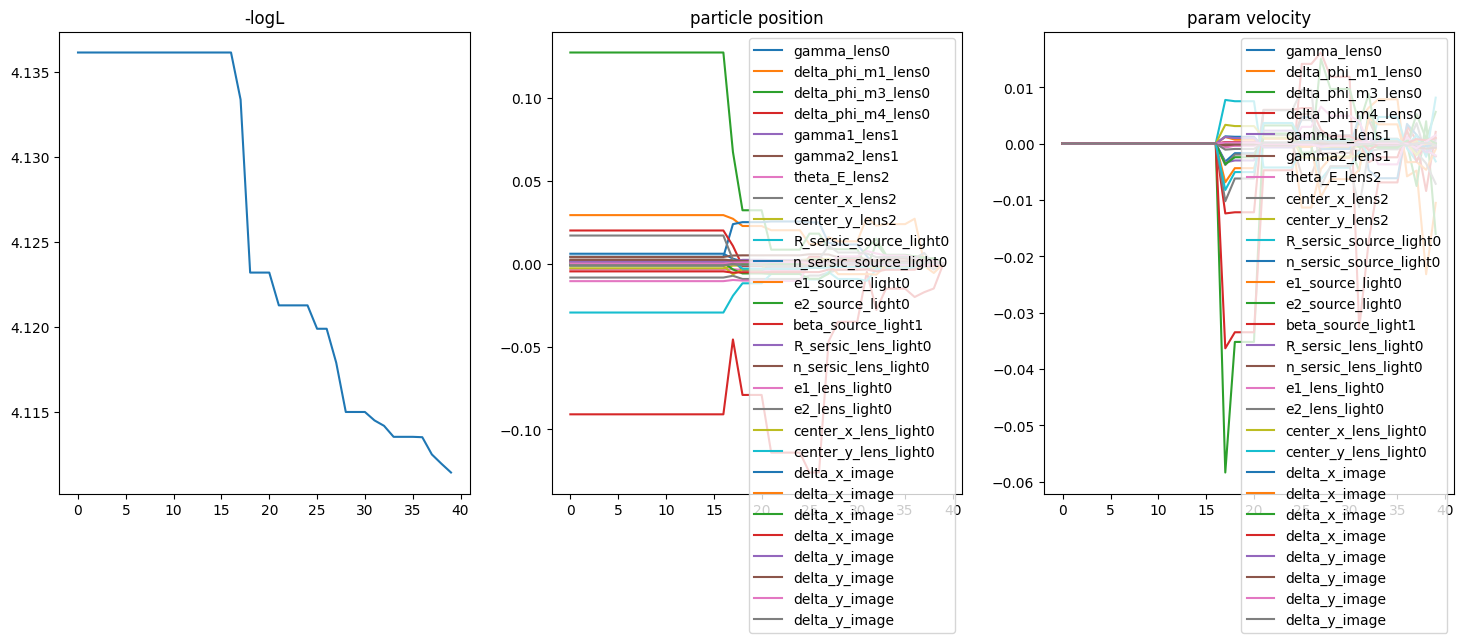

<Figure size 640x480 with 0 Axes>

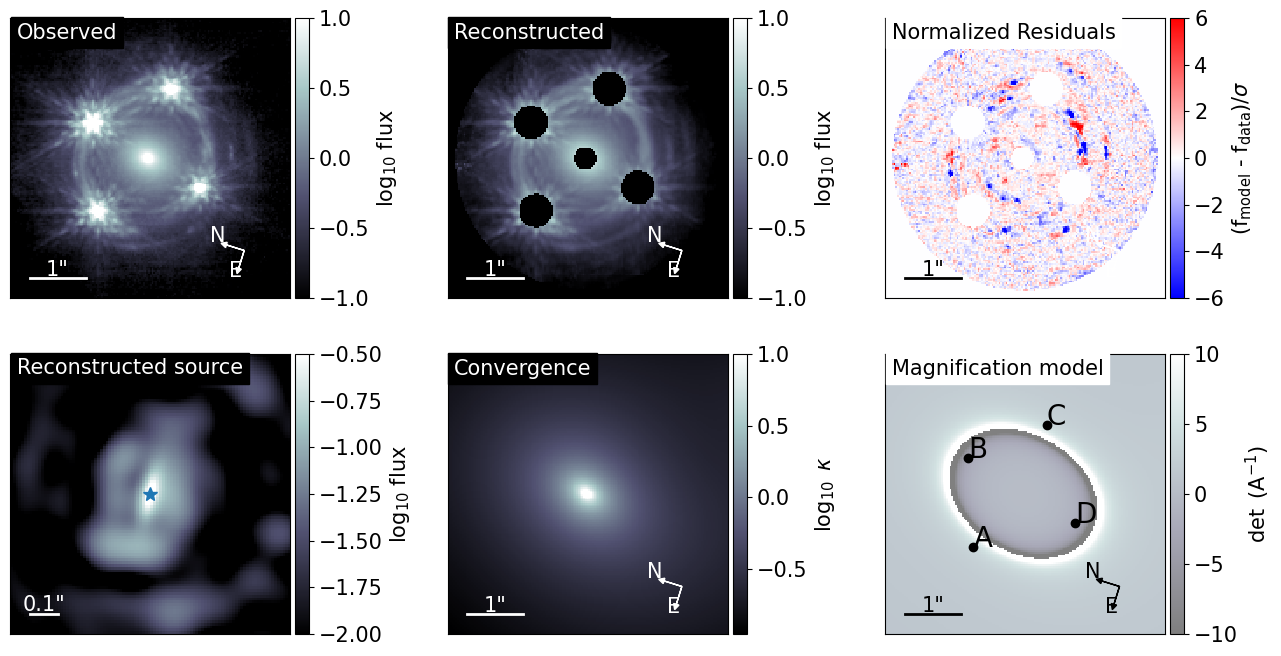

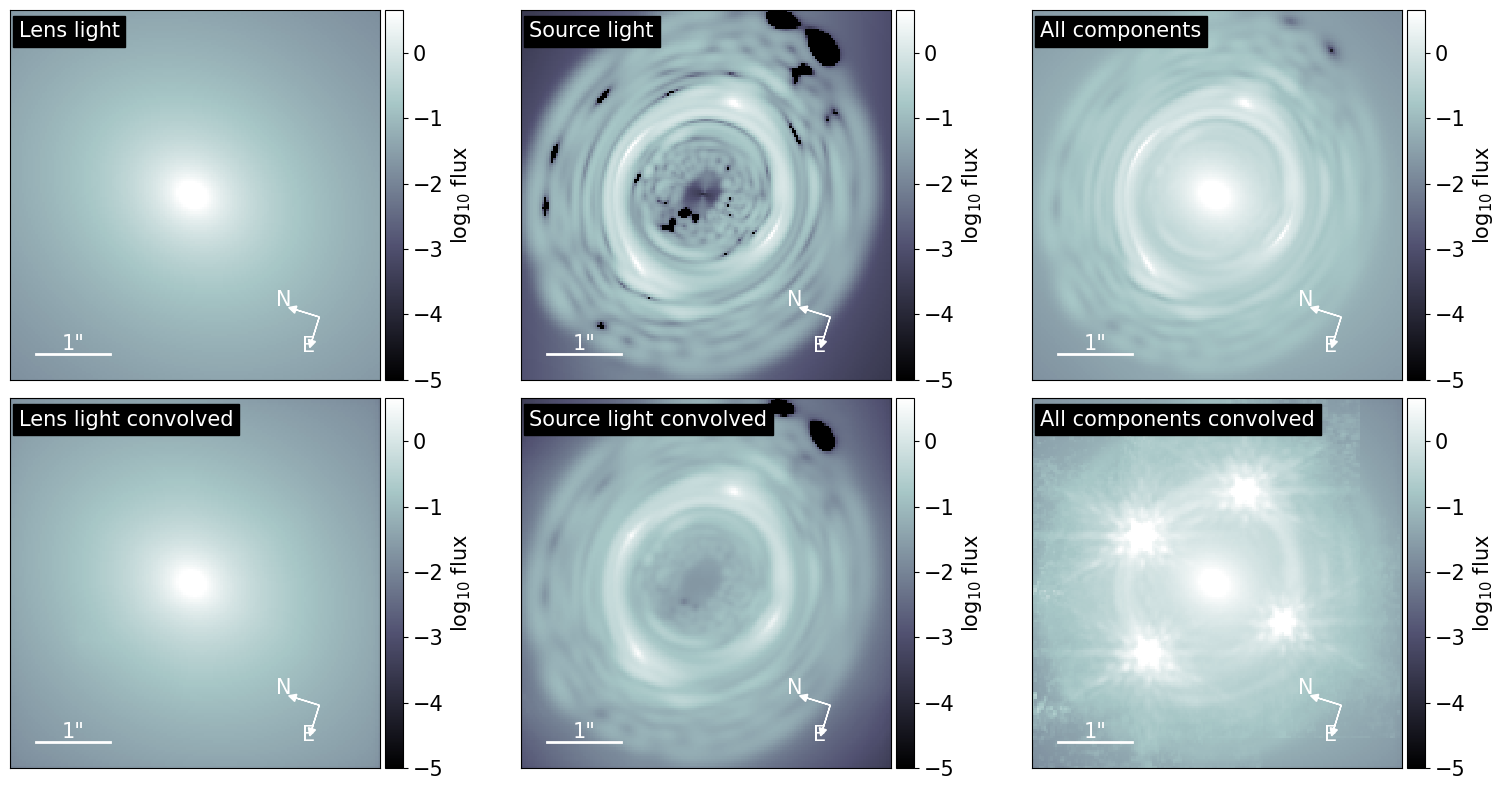

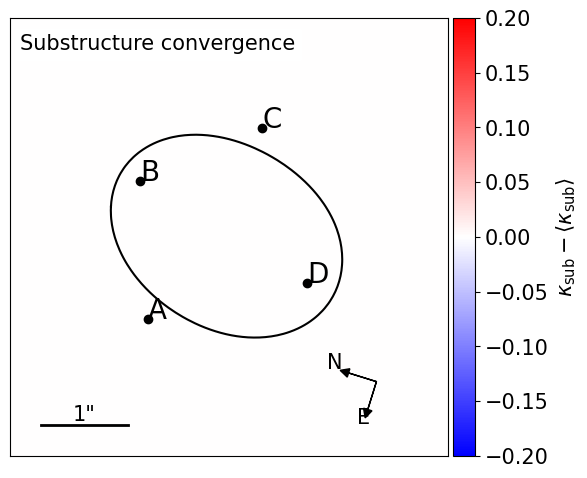

kwargs_lens = [{'theta_E': 1.1866328477912638, 'gamma': 2.231522243847346, 'e1': -0.11672567206463316, 'e2': -0.060247711999381705, 'center_x': 0.020825690996759138, 'center_y': 0.04228559733957989, 'a1_a': 0.0, 'delta_phi_m1': 0.021604783031618016, 'a3_a': 0.0, 'delta_phi_m3': -0.04302956299881583, 'a4_a': 0.0, 'delta_phi_m4': -0.2696331900061123}, {'gamma1': 0.045535303237921175, 'gamma2': 0.045267011950353035, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.320269167393924, 'center_x': -1.8401932911473686, 'center_y': -3.0562019007674013}]
kwargs_source = [{'amp': 49.48507006035035, 'R_sersic': 0.4602688173543981, 'n_sersic': 4.886049805630022, 'e1': 0.4558607246083997, 'e2': -0.0616359052060315, 'center_x': -0.1546758090431972, 'center_y': -0.16523374434556715}, {'amp': array([ 4.73550370e+02,  1.65088436e+02, -4.49202473e+01,  1.30406934e+02,
       -2.02812352e+00,  1.22125957e+02,  5.85315434e+01, -9.53293745e+01,
        1.51886683e+01,  3.24583239e+01,  4.73045573e+01, -8.98253398e+

In [4]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result_1, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask_imaging_weights],fast_caustic=True)

param_class = fitting_sequence_1.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list_1)):
    chain_plot.plot_chain_list(chain_list_1, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0], v_min=-1, v_max=1.)
modelPlot.model_plot(ax=axes[0,1], v_min=-1, v_max=1.)
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100, 
                      v_min=-2.0, v_max=-0.5)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()
# -1.349
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.subplot(111)
kwargs_plot = {'ax': ax,
               'index_macromodel': [0, 1, 2], 
              'with_critical_curves': True,
              'v_min': -0.2,'v_max': 0.2}
modelPlot.substructure_plot(band_index=0, **kwargs_plot)
plt.show() 

print('kwargs_lens = ' +str(repr(kwargs_result_1['kwargs_lens'])))
print('kwargs_source = ' +str(kwargs_result_1['kwargs_source']))
print('kwargs_lens_light = ' +str(kwargs_result_1['kwargs_lens_light']))
print('kwargs_ps = ' +str(kwargs_result_1['kwargs_ps']))
print('kwargs_special = ' +str(kwargs_result_1['kwargs_special']))

-2.313863757489219 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.313863757489399


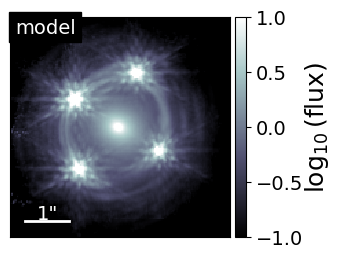

In [11]:
kwargs_result = kwargs_result_1
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=None,fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -1
v_max = v_min +2
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='model',font_size=14,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)
plt.savefig('he0435_model_cutout.pdf',bbox_inches='tight')

In [ ]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'

kwargs_result = kwargs_result_1
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -2.
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_-0.2, y_-0.6, r'$G_1$', fontsize=18, color='g')

satx = kwargs_result['kwargs_lens'][2]['center_x']
saty = kwargs_result['kwargs_lens'][2]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
print(xplot, yplot)
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
#ax3.plot(0.5, 3.8, ".", color='g',markersize=12,alpha=1.)
ax3.text(4., 3., r'$G_2$', fontsize=18, color='g')
ax3.arrow(3.8, 3.6, 0.5, 0.1,color='g',width=0.06)

ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/0435bmodel.pdf',bbox_inches='tight')

In [ ]:
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source']), origin='lower',vmin=-6,vmax=-2)
# plt.show()
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['psf_error_map']), origin='lower')
# plt.show()
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source_init']),origin='lower')

# import sys
# import os
# np.set_printoptions(threshold=sys.maxsize)
# path_to_data = os.getenv('HOME')+'/Code/samana/samana/Data/ImageData/'
# with open(path_to_data+'he0435_nircam_dithered.py', 'w') as f:
#     f.write('import numpy as np\n\n')
#     f.write('image_data = np.'+str(repr(data.kwargs_data['image_data'])))
#     f.write('\n')
#     f.write('psf_model = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source'])))
#     f.write('\n')
#     f.write('psf_model_init = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source_init'])))
#     f.write('\n')
#     f.write('psf_error_map = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['psf_error_map'])))
#     f.write('\n')
# f.close()

In [ ]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )
for i in range(0, 10000):
    poisson = image_util.add_poisson(image_sim_no_noise, exp_time=data.kwargs_data['exposure_time'])
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=data.kwargs_data['background_rms'])
    noise_map = bkg + poisson
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))

In [ ]:
kw = {'a': 1, 'b': 2}
kw.pop('a')
print(kw)